# Study 1: Model Evaluation Reliability

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

## Load the evaluation data

In [59]:
data = pd.read_csv('out/study1.csv')
data.head()

,metric,estimator,bias,variance,n,i
0,CCC,In-Sample,0.442496,NaN,50,0
1,CCC,2-Fold CV,0.264011,0.000155,50,0
2,CCC,5-Fold CV,0.191129,0.082399,50,0
3,CCC,10-Fold CV,0.018586,0.344915,50,0
4,CCC,LOOCV,0.076397,NaN,50,0


## Figure 1: Model Evaluation Reliability (Bias)

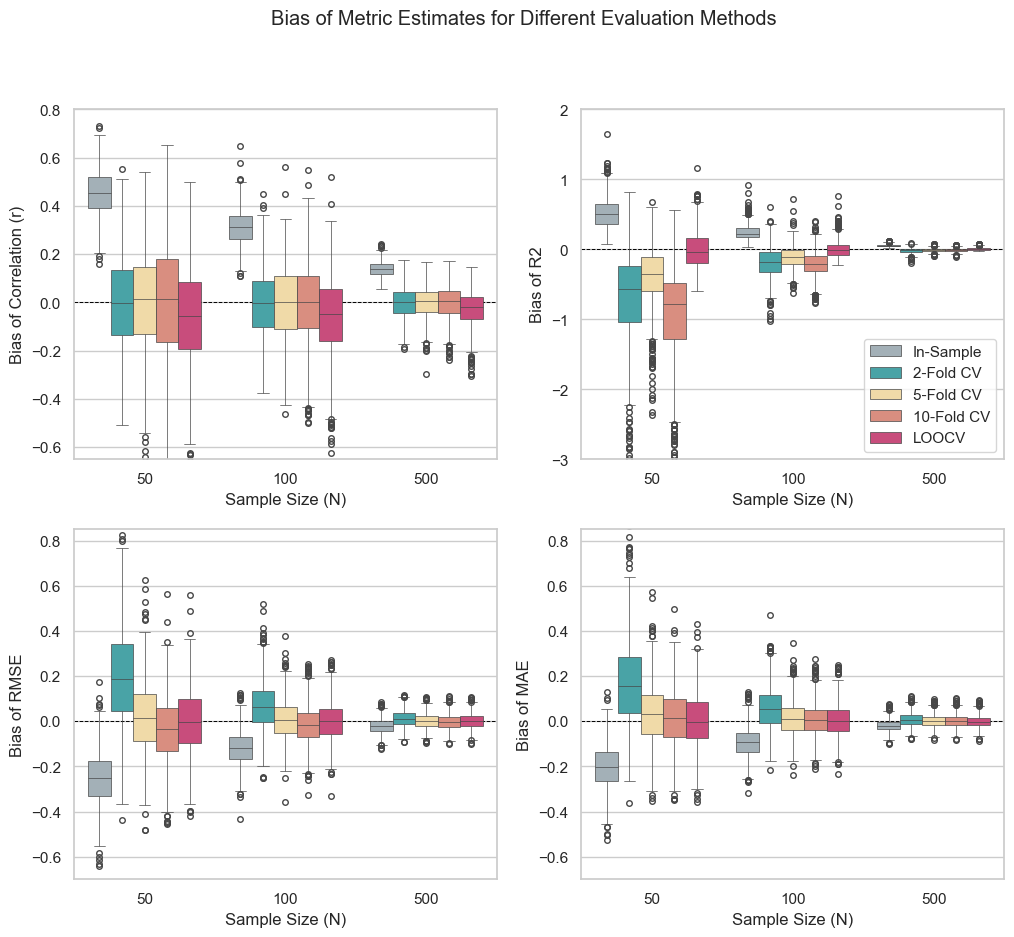

In [62]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA", "#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, m in enumerate(["r", "RMSE", "R2", "MAE"]):
    j = i % 2
    k = i // 2
    ax = axes[j][k]
    ax.axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    sns.boxplot(
        x="n",
        y="bias",
        hue="estimator",
        data=data.query("metric == '%s'" % m),
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=ax,
    )
    ax.set_xlabel("Sample Size (N)")
    ax.set_ylabel(m)

# r
# axes[0][0].set_title("Correlation (r)")
axes[0][0].set_ylim(-0.65, 0.8)
axes[0][0].set_ylabel("Bias of Correlation (r)")
# R2
# axes[0][1].set_title("Coefficient of Determination (R2)")
axes[0][1].set_ylim(-2.5, 1.3)
# axes[0][1].set_yscale("symlog", base=2)
axes[0][1].set_yticks([-3, -2, -1, 0, 1, 2])
axes[0][1].set_ylabel("Bias of R2")

# RMSE
# axes[1][0].set_title("Root Mean Squared Error (RMSE)")
axes[1][0].set_ylim(-0.7, 0.85)
axes[1][0].set_ylabel("Bias of RMSE")

# MAE
# axes[1][1].set_title("Mean Absolute Error (MAE)")
axes[1][1].set_ylim(-0.7, 0.85)
axes[1][1].set_ylabel("Bias of MAE")

# legend
axes[0][0].get_legend().remove()
axes[0][1].legend(loc="lower right", ncol=1)
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()

# show
fig.suptitle("Bias of Metric Estimates for Different Evaluation Methods")
fig.savefig("out/study1a.png", dpi=300)

## Figure 2: Model Evaluation Reliability (Variance)

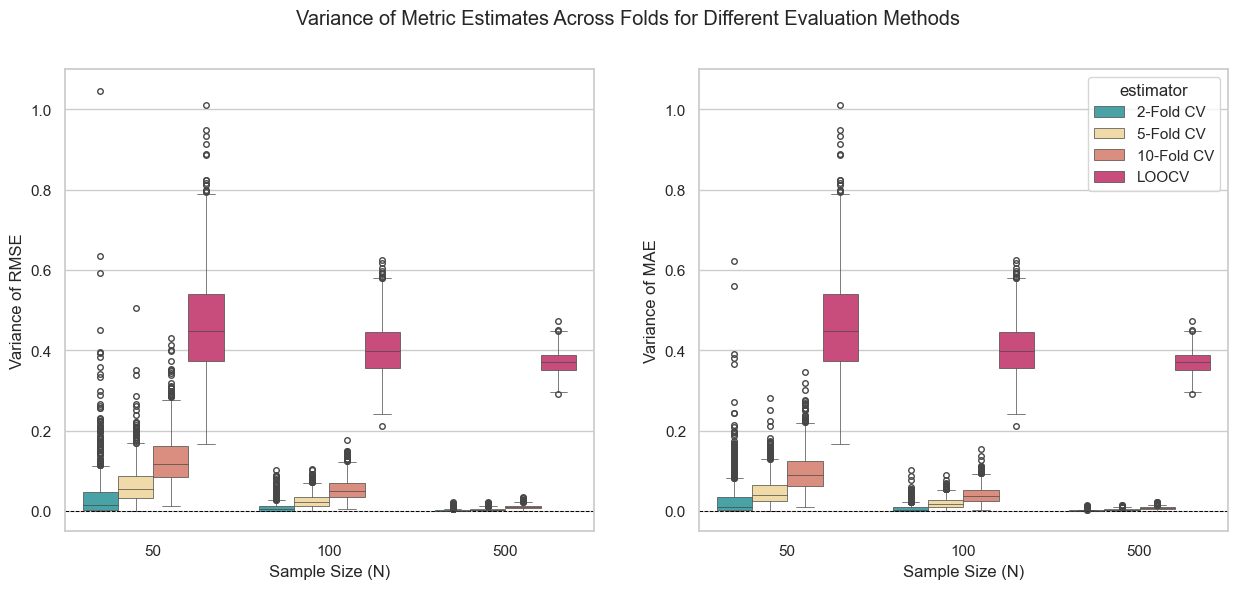

In [63]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, m in enumerate(["RMSE", "MAE"]):
    sns.boxplot(
        data=data.query(f"metric == '{m}' and estimator != 'In-Sample'"),
        x="n", y="variance",
        hue="estimator",
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    axes[i].set_ylim(-0.05, 1.1)
    axes[i].set_xlabel("Sample Size (N)")

# RMSE
axes[0].get_legend().remove()
axes[0].set_ylabel("Variance of RMSE")

# MAE
axes[1].set_ylabel("Variance of MAE")

fig.suptitle("Variance of Metric Estimates Across Folds for Different Evaluation Methods")
fig.savefig("out/study1b.png", dpi=300)